In [1]:
import os
os.chdir(r'/Users/zhanghui/商业分析工具和应用/Python/Python_book/14Clustor')

层次聚类

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cities = pd.read_csv('cities_10.csv', encoding = 'gbk')
cities

,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
1,山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
2,河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
3,天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
4,江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7
5,上海,5408.8,40627,2196.2,2755.8,1970.2,779.3,2035.2,320.5,709.0
6,浙江,7670.0,16570,2356.5,3065.0,2296.6,1180.6,2877.5,294.2,566.9
7,福建,4682.0,13510,1047.1,1859.0,964.5,397.9,1663.3,173.7,272.9
8,广东,11769.7,15030,4224.6,4793.6,3022.9,1275.5,5013.6,1843.7,1201.6
9,广西,2455.4,5062,367.0,995.7,542.2,352.7,1025.5,15.1,186.7


这份数据经济总量的指标有8个，人均经济量的指标只有1个，如果使用原始变量进行聚类，聚类结果将几乎全部由经济总量决定。所以需要我们对数据进行维度分析和降维。

In [4]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA,FactorAnalysis

scale_cities = scale(cities.ix[:,1:])
cities_pca_score = PCA(n_components = 2).fit_transform(scale_cities)#主成分分析
cities_fa_score = FactorAnalysis(n_components = 2).fit_transform(scale_cities)#因子分析

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


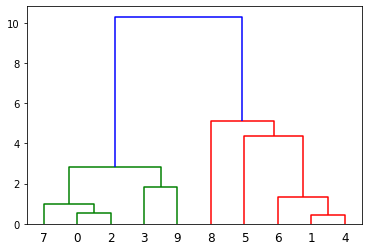

In [5]:
import scipy.cluster.hierarchy as sch
disMat = sch.distance.pdist(cities_pca_score,'euclidean')#生存距离矩阵
Z = sch.linkage(disMat,method = 'ward')#进行层次聚类
P = sch.dendrogram(Z)#将层次聚类结果以树形图表示出来

In [6]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters =4,linkage = 'ward',compute_full_tree = False)
ward.fit(cities_pca_score)

AgglomerativeClustering(affinity='euclidean', compute_full_tree=False,
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [7]:
cities['total'] = cities_pca_score[:,0]
cities['average'] = cities_pca_score[:,1]
cities['cluster'] = ward.labels_

# K-Means聚类

In [10]:
from sklearn import datasets
iris = datasets.load_iris()

In [11]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [13]:
iris_pca = PCA(n_components = 2)
iris_pca_score = iris_pca.fit_transform(iris.data)
print(iris_pca.explained_variance_ratio_)

[0.92461872 0.05306648]


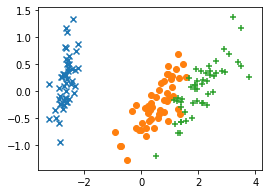

In [15]:
plt.figure(figsize = [4,3])
for cluster,marker in zip (range(3),['x','o','+']):
    x_axis = iris_pca_score[:,0][iris.target == cluster]
    y_axis = iris_pca_score[:,1][iris.target ==cluster]
    plt.scatter(x_axis,y_axis,marker = marker)
plt.show()

In [16]:
from sklearn.cluster import KMeans

iris_kmeans = KMeans(n_clusters = 3, n_init = 15)
iris_kmeans.fit(iris_pca_score)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
print('Labels:',iris_kmeans.labels_[:5])
print('Prediction:',iris_kmeans.predict(iris_pca_score)[:5])
print('Center:\n',iris_kmeans.cluster_centers_)

Labels: [0 0 0 0 0]
Prediction: [0 0 0 0 0]
Center:
 [[-2.64241546  0.19088505]
 [ 2.34652659  0.27393856]
 [ 0.66567601 -0.3316042 ]]


# 密度聚类

In [19]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.3,min_samples = 6)
dbscan.fit(iris_pca_score)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [20]:
dbscan.labels_.min()

-1

In [22]:
from sklearn.metrics import adjusted_rand_score
print('ARI',adjusted_rand_score(iris.target,dbscan.labels_))

ARI 0.584245005697512


In [23]:
#排除离群点
mask = dbscan.labels_>-1
print('ARI',adjusted_rand_score(iris.target[mask],dbscan.labels_[mask]))

ARI 0.7371657536975863


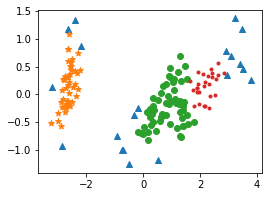

In [25]:
#绘图
plt.figure(figsize = [4,3])

for cluster,marker in zip(range(-1,3),['^','*','o','.']):
    x_axis = iris_pca_score[:,0][dbscan.labels_ == cluster]
    y_axis = iris_pca_score[:,1][dbscan.labels_ == cluster]
    plt.scatter(x_axis,y_axis,marker = marker)
    
plt.show()


图中三角形即是离群点，他们的密度都很低。
密度聚类在商业分析中主要用于确定异常值。